# Assignment 2 (Data Exploration and Preprocessing):


#### import modules :

In [249]:
# import modules
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from random import randint
from sklearn import preprocessing
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,chi2

#### load  and explore dataset :

number of attributes :  20


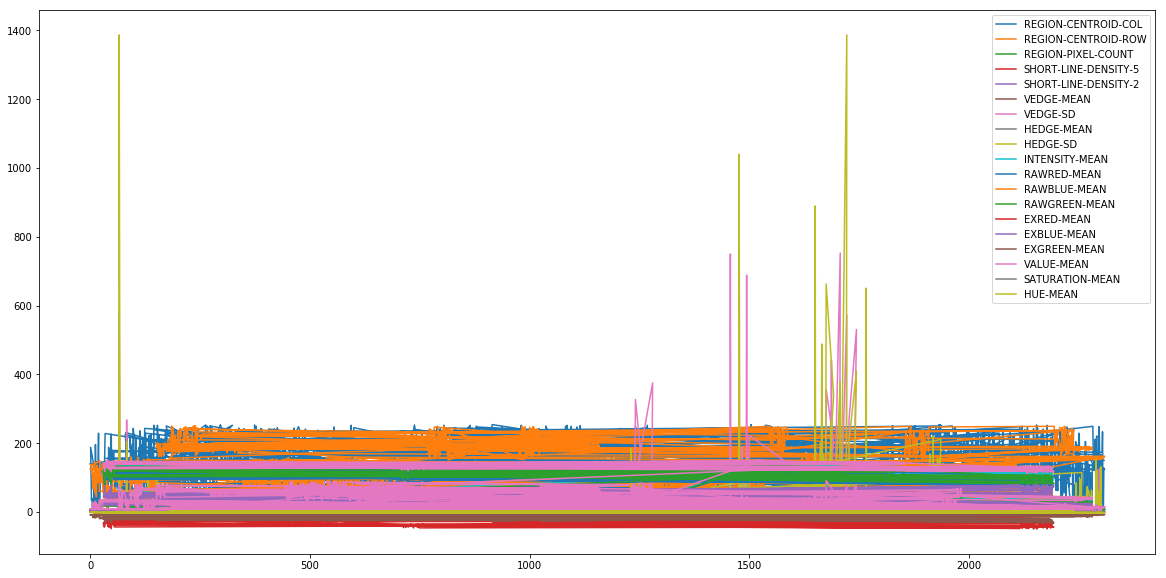

In [250]:
# read the data
data = pd.read_csv('segmentation.csv')
data = data.sort_values('CLASS', ascending=True)
# get the atrribute names ()
atrribute_names = list(data.columns.values)
print ("number of attributes : ", len(atrribute_names))
data.plot(figsize = (20,10))

### Data Exploration :
#### Pearson’s correlation:


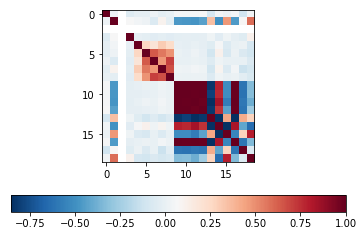

In [251]:
#Pearson’s correlation
pearson = data.corr(method = 'pearson')
im = plt.imshow(pearson,cmap = 'RdBu_r')
plt.colorbar(im, orientation='horizontal')
plt.show()

#### Covariance

                      REGION-CENTROID-COL  REGION-CENTROID-ROW  \
REGION-CENTROID-COL           5322.655633           112.261605   
REGION-CENTROID-ROW            112.261605          3304.393117   
REGION-PIXEL-COUNT               0.000000             0.000000   
SHORT-LINE-DENSITY-5            -0.152222             0.149783   
SHORT-LINE-DENSITY-2            -0.028226             0.058327   
VEDGE-MEAN                      -2.225830             4.056431   
VEDGE-SD                        71.850789          -138.121244   
HEDGE-MEAN                      -4.981611            21.835935   
HEDGE-SD                        -8.318737           -71.256512   
INTENSITY-MEAN                 164.209187         -1020.982645   
RAWRED-MEAN                    139.753091          -942.593272   
RAWBLUE-MEAN                   184.722513         -1204.825006   
RAWGREEN-MEAN                  168.151958          -915.529680   
EXRED-MEAN                     -73.368285           235.168129   
EXBLUE-MEA

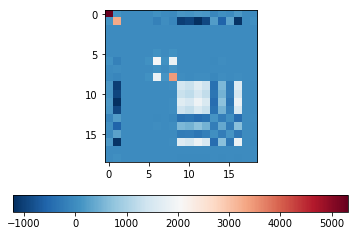

In [261]:
cov_matrix = data.cov()
print(cov_matrix)
im = plt.imshow(cov_matrix,cmap = 'RdBu_r')
plt.colorbar(im, orientation='horizontal')
plt.show()

#### Histograms


In [253]:
#splitting data according to classes
BRICKFACE = (data.loc[data['CLASS'] == 'BRICKFACE']).as_matrix(columns = None)
SKY = data.loc[data['CLASS'] == 'SKY'].as_matrix(columns = None)
FOLIAGE = data.loc[data['CLASS'] == 'FOLIAGE'].as_matrix(columns = None)
CEMENT = data.loc[data['CLASS'] == 'CEMENT'].as_matrix(columns = None)
WINDOW = data.loc[data['CLASS'] == 'WINDOW'].as_matrix(columns = None)
PATH = data.loc[data['CLASS'] == 'PATH'].as_matrix(columns = None)
GRASS = data.loc[data['CLASS'] == 'GRASS'].as_matrix(columns = None)

/home/mostafa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/mostafa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mostafa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/home/mostafa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """
/home/mostafa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/mostafa/anaconda3/li

### bin = 5

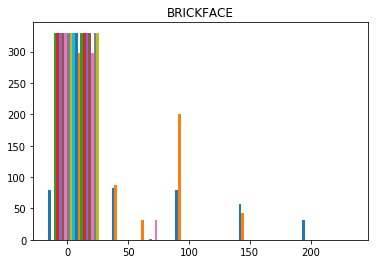

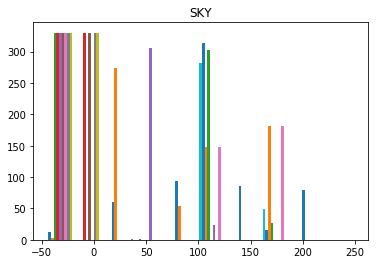

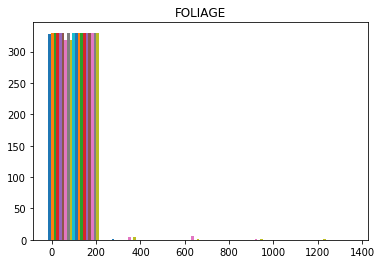

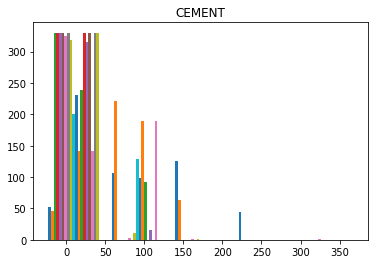

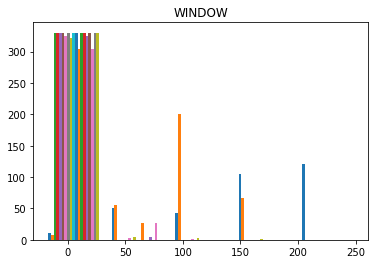

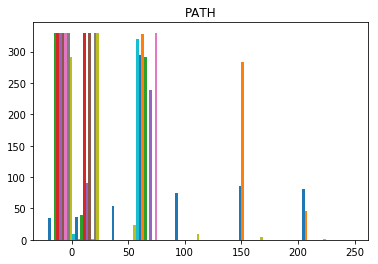

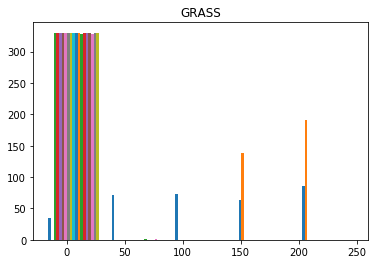

In [254]:
#histogram for each class bins = 5
n, bins, patches = plt.hist(BRICKFACE[:,1:], 5)
plt.title("BRICKFACE")
plt.show()
n, bins, patches = plt.hist(SKY[:,1:], 5)
plt.title("SKY")
plt.show()
n, bins, patches = plt.hist(FOLIAGE[:,1:], 5)
plt.title("FOLIAGE")
plt.show()
n, bins, patches = plt.hist(CEMENT[:,1:], 5)
plt.title("CEMENT")
plt.show()
n, bins, patches = plt.hist(WINDOW[:,1:], 5)
plt.title("WINDOW")
plt.show()
n, bins, patches = plt.hist(PATH[:,1:], 5)
plt.title("PATH")
plt.show()
n, bins, patches = plt.hist(GRASS[:,1:], 5)
plt.title("GRASS")
plt.show()

### bin = 12

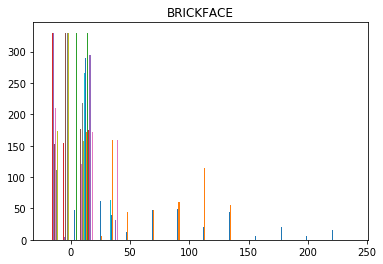

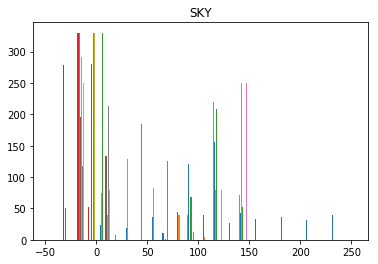

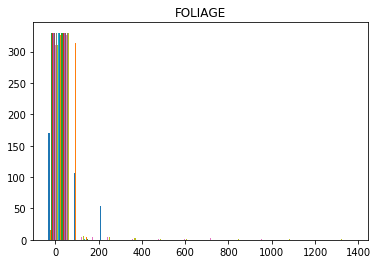

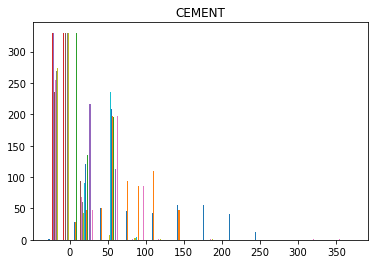

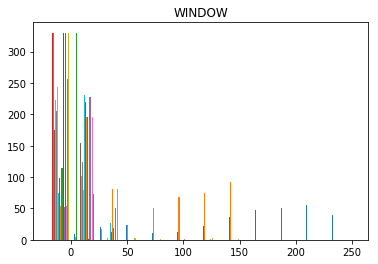

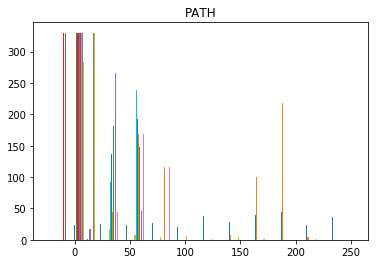

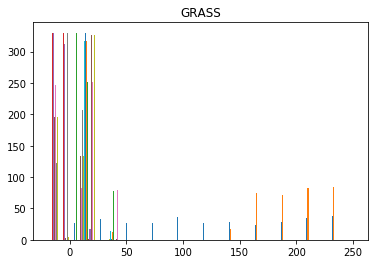

In [255]:
#histogram for each class bins = 12
n, bins, patches = plt.hist(BRICKFACE[:,1:], 12)
plt.title("BRICKFACE")
plt.show()
n, bins, patches = plt.hist(SKY[:,1:], 12)
plt.title("SKY")
plt.show()
n, bins, patches = plt.hist(FOLIAGE[:,1:], 12)
plt.title("FOLIAGE")
plt.show()
n, bins, patches = plt.hist(CEMENT[:,1:], 12)
plt.title("CEMENT")
plt.show()
n, bins, patches = plt.hist(WINDOW[:,1:], 12)
plt.title("WINDOW")
plt.show()
n, bins, patches = plt.hist(PATH[:,1:], 12)
plt.title("PATH")
plt.show()
n, bins, patches = plt.hist(GRASS[:,1:], 12)
plt.title("GRASS")
plt.show()

### bin = 10

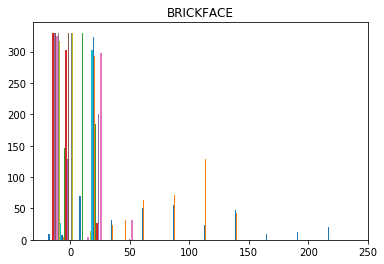

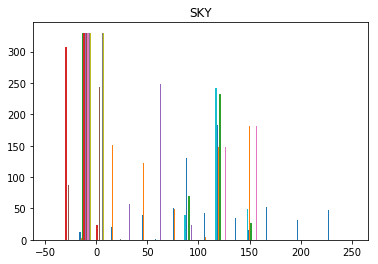

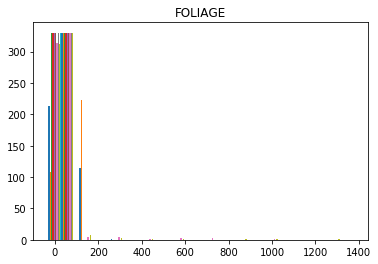

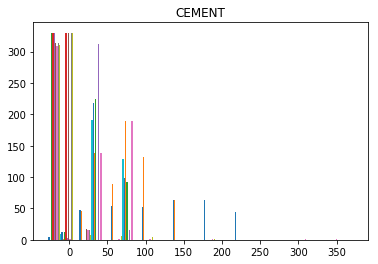

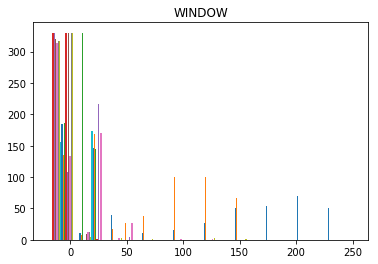

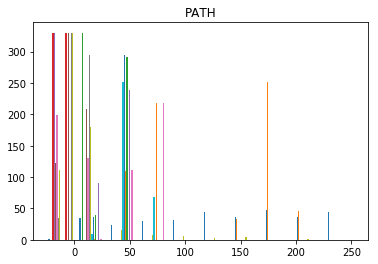

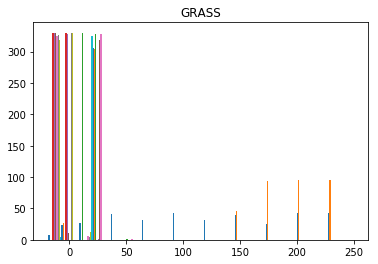

In [256]:
#histogram for each class bins = 10
n, bins, patches = plt.hist(BRICKFACE[:,1:], 10)
plt.title("BRICKFACE")
plt.show()
n, bins, patches = plt.hist(SKY[:,1:], 10)
plt.title("SKY")
plt.show()
n, bins, patches = plt.hist(FOLIAGE[:,1:], 10)
plt.title("FOLIAGE")
plt.show()
n, bins, patches = plt.hist(CEMENT[:,1:], 10)
plt.title("CEMENT")
plt.show()
n, bins, patches = plt.hist(WINDOW[:,1:], 10)
plt.title("WINDOW")
plt.show()
n, bins, patches = plt.hist(PATH[:,1:], 10)
plt.title("PATH")
plt.show()
n, bins, patches = plt.hist(GRASS[:,1:], 10)
plt.title("GRASS")
plt.show()

#### Normalization
##### Min-max scaler :
reduce the range of the orignal data from [-2,1400] to [0,1]

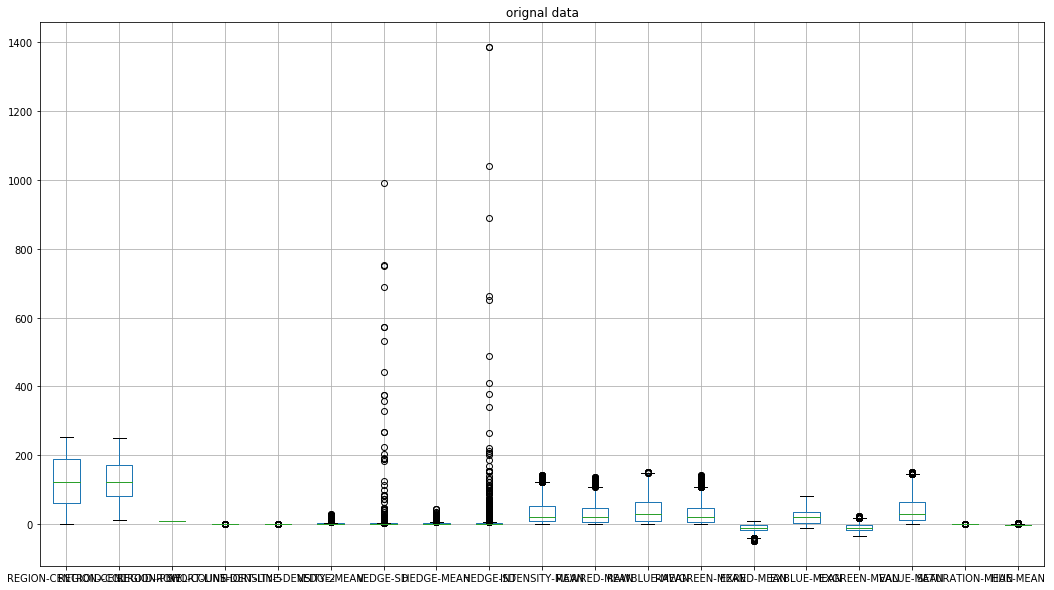

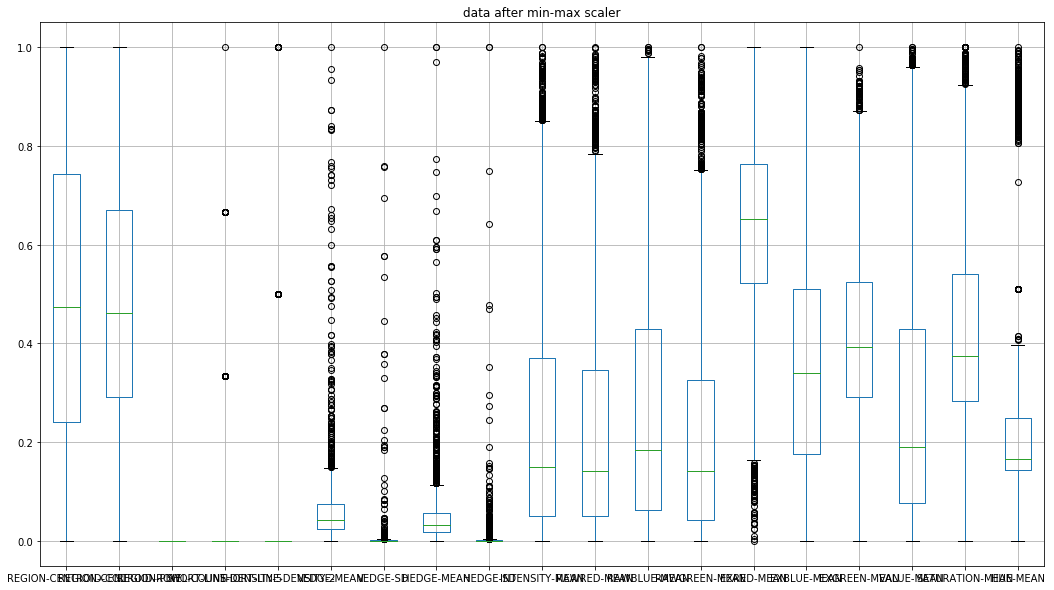

In [257]:
min_max_data = data.copy()
features = min_max_data[list(atrribute_names[1:])].values
scaler = MinMaxScaler()
scaler.fit(features)
features = scaler.transform(features)
min_max_data[list(atrribute_names[1:])] = features
data.boxplot(figsize=[18, 10])
plt.title("orignal data")
plt.show()
min_max_data.boxplot(figsize=[18, 10])
plt.title("data after min-max scaler")
plt.show()

###### Z-score normalization :
reduce the range of the data from [-2, 1400] to [-2, 2]
where var = 2 and mean = 0

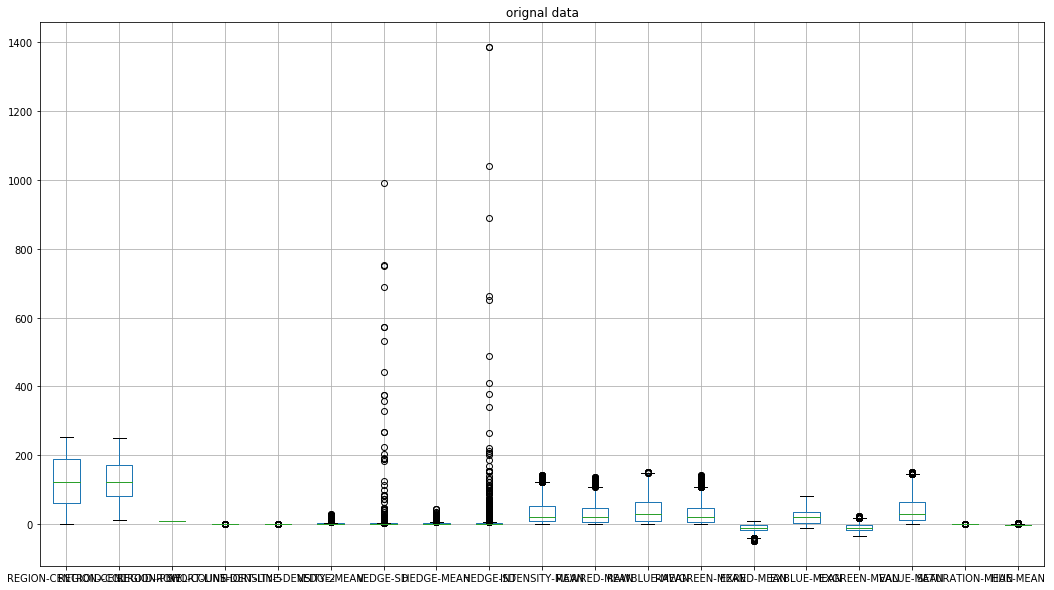

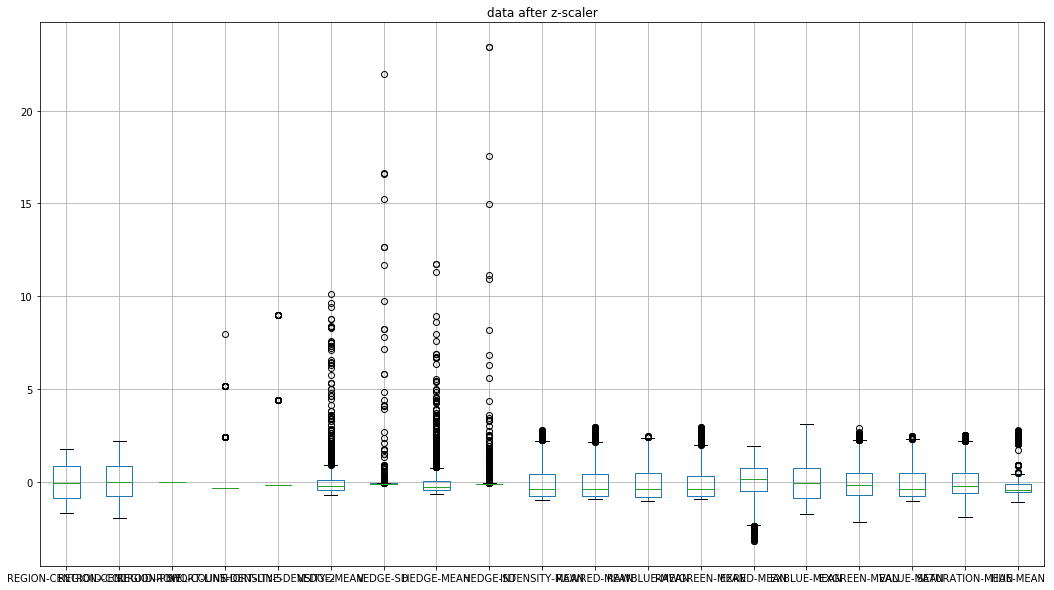

In [258]:
z_data = data.copy()
features = z_data[list(atrribute_names[1:])].values
std_scale = preprocessing.StandardScaler()
#features = stats.zscore(features)
features = std_scale.fit_transform(features)
z_data[list(atrribute_names[1:])] = features
data.boxplot(figsize=[18, 10])
plt.title("orignal data")
plt.show()
z_data.boxplot(figsize=[18, 10])
plt.title("data after z-scaler")
plt.show()

#### Dimensionality reduction
##### Feature Projection :

variance captured by ( 1 ) components: [0.42341135]


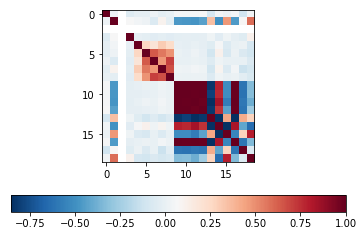

variance captured by ( 2 ) components: [0.42341135 0.16203649]


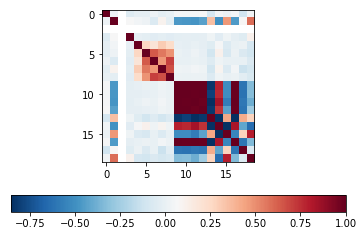

variance captured by ( 3 ) components: [0.42341135 0.16203649 0.09959451]


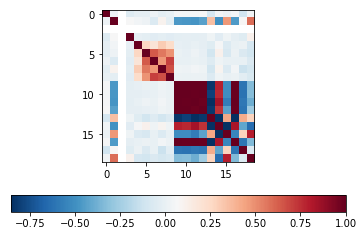

variance captured by ( 4 ) components: [0.42341135 0.16203649 0.09959451 0.05857283]


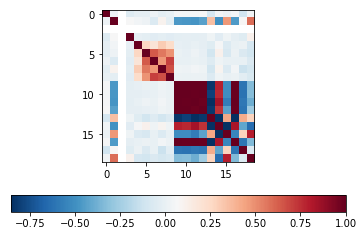

variance captured by ( 5 ) components: [0.42341135 0.16203649 0.09959451 0.05857283 0.05197997]


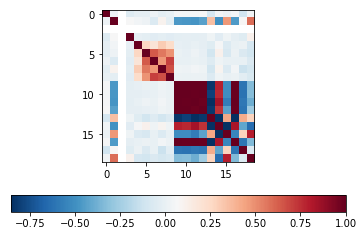

variance captured by ( 6 ) components: [0.42341135 0.16203649 0.09959451 0.05857283 0.05197997 0.05050372]


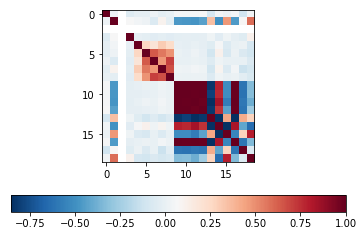

variance captured by ( 7 ) components: [0.42341135 0.16203649 0.09959451 0.05857283 0.05197997 0.05050372
 0.04041415]


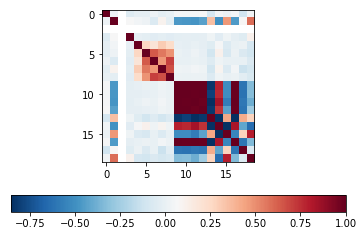

variance captured by ( 8 ) components: [0.42341135 0.16203649 0.09959451 0.05857283 0.05197997 0.05050372
 0.04041415 0.03120143]


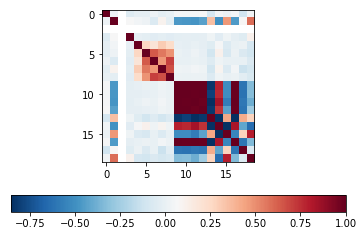

variance captured by ( 9 ) components: [0.42341135 0.16203649 0.09959451 0.05857283 0.05197997 0.05050372
 0.04041415 0.03120143 0.02999802]


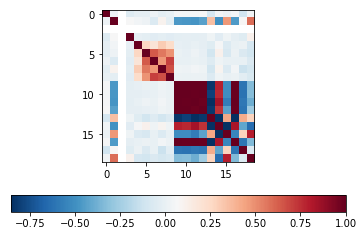

variance captured by ( 10 ) components: [0.42341135 0.16203649 0.09959451 0.05857283 0.05197997 0.05050372
 0.04041415 0.03120143 0.02999802 0.02195028]


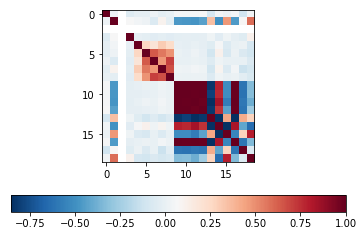

variance captured by ( 11 ) components: [0.42341135 0.16203649 0.09959451 0.05857283 0.05197997 0.05050372
 0.04041415 0.03120143 0.02999802 0.02195028 0.0142209 ]


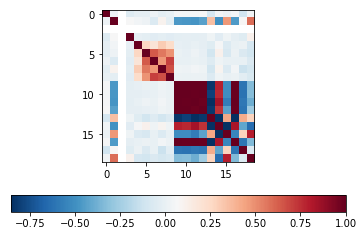

variance captured by ( 12 ) components: [0.42341135 0.16203649 0.09959451 0.05857283 0.05197997 0.05050372
 0.04041415 0.03120143 0.02999802 0.02195028 0.0142209  0.00993527]


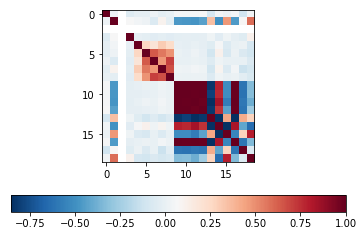

variance captured by ( 13 ) components: [0.42341135 0.16203649 0.09959451 0.05857283 0.05197997 0.05050372
 0.04041415 0.03120143 0.02999802 0.02195028 0.0142209  0.00993527
 0.00616366]


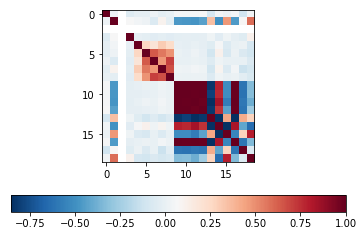

variance captured by ( 14 ) components: [4.23411347e-01 1.62036489e-01 9.95945088e-02 5.85728321e-02
 5.19799667e-02 5.05037229e-02 4.04141498e-02 3.12014310e-02
 2.99980217e-02 2.19502844e-02 1.42209011e-02 9.93526978e-03
 6.16366453e-03 1.74116798e-05]


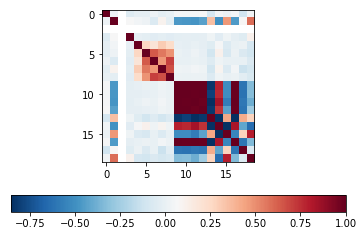

variance captured by ( 15 ) components: [4.23411347e-01 1.62036489e-01 9.95945088e-02 5.85728321e-02
 5.19799667e-02 5.05037229e-02 4.04141498e-02 3.12014310e-02
 2.99980217e-02 2.19502844e-02 1.42209011e-02 9.93526978e-03
 6.16366453e-03 1.74116798e-05 1.58780274e-16]


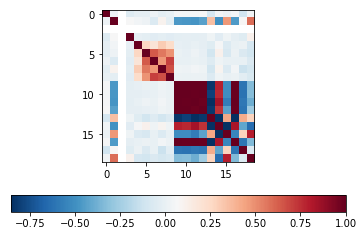

variance captured by ( 16 ) components: [4.23411347e-01 1.62036489e-01 9.95945088e-02 5.85728321e-02
 5.19799667e-02 5.05037229e-02 4.04141498e-02 3.12014310e-02
 2.99980217e-02 2.19502844e-02 1.42209011e-02 9.93526978e-03
 6.16366453e-03 1.74116798e-05 1.58780274e-16 1.30219428e-16]


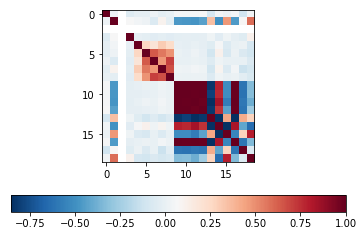

variance captured by ( 17 ) components: [4.23411347e-01 1.62036489e-01 9.95945088e-02 5.85728321e-02
 5.19799667e-02 5.05037229e-02 4.04141498e-02 3.12014310e-02
 2.99980217e-02 2.19502844e-02 1.42209011e-02 9.93526978e-03
 6.16366453e-03 1.74116798e-05 1.58780274e-16 1.30219428e-16
 1.03964749e-16]


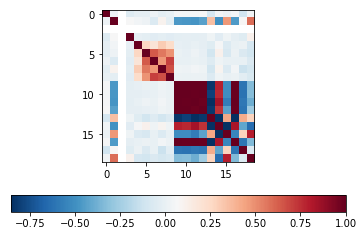

variance captured by ( 18 ) components: [4.23411347e-01 1.62036489e-01 9.95945088e-02 5.85728321e-02
 5.19799667e-02 5.05037229e-02 4.04141498e-02 3.12014310e-02
 2.99980217e-02 2.19502844e-02 1.42209011e-02 9.93526978e-03
 6.16366453e-03 1.74116798e-05 1.58780274e-16 1.30219428e-16
 1.03964749e-16 9.55203033e-17]


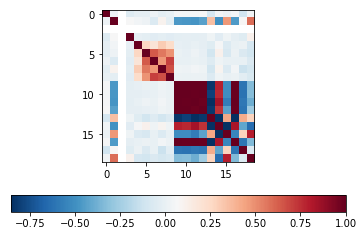

variance captured by ( 19 ) components: [4.23411347e-01 1.62036489e-01 9.95945088e-02 5.85728321e-02
 5.19799667e-02 5.05037229e-02 4.04141498e-02 3.12014310e-02
 2.99980217e-02 2.19502844e-02 1.42209011e-02 9.93526978e-03
 6.16366453e-03 1.74116798e-05 1.58780274e-16 1.30219428e-16
 1.03964749e-16 9.55203033e-17 2.77452769e-35]


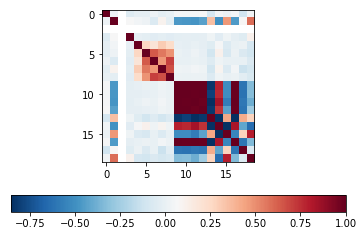

In [259]:
pca_data = z_data.copy()
for i in range(1, 20):
    pca= PCA(n_components = i)
    features = z_data[list(atrribute_names[1:])].values
    pca.fit(features)
    print ("variance captured by","(",i,") components:",pca.explained_variance_ratio_)
    pca_data[list(atrribute_names[1:])] = features
    pearson = pca_data.corr(method = 'pearson')
    im = plt.imshow(pearson,cmap = 'RdBu_r')
    plt.colorbar(im, orientation='horizontal')
    plt.show()
    

##### Feature selection

	Feature selection with k =  2 

[[ 0.52020471  0.15603794]
 [ 0.05897233 -0.21839899]
 [-0.14265442 -0.10149187]
 ...
 [ 1.41552191 -0.41728735]
 [ 0.65762454 -0.50135662]
 [ 0.28753625 -0.49865054]]


/home/mostafa/anaconda3/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:109: RuntimeWarning: invalid value encountered in true_divide
  msw = sswn / float(dfwn)


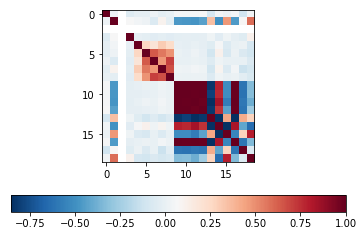

	Feature selection with k =  3 

[[-0.8706022   0.52020471  0.15603794]
 [-0.38900172  0.05897233 -0.21839899]
 [-0.45632224 -0.14265442 -0.10149187]
 ...
 [-1.01042169  1.41552191 -0.41728735]
 [-0.5184642   0.65762454 -0.50135662]
 [-0.49516095  0.28753625 -0.49865054]]


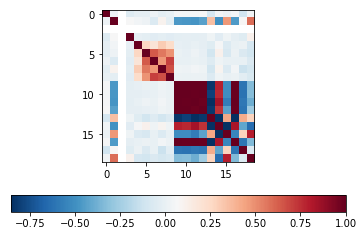

In [260]:
for i in range (2, 4):
    z_data_copy = z_data.copy()
    values = SelectKBest(k = i).fit_transform(X = z_data_copy[list(atrribute_names[1:])], y = z_data_copy.index)
    print ("\tFeature selection with k = ",i, "\n")
    print (values[0:, 0:])
    pearson = z_data_copy.corr(method = 'pearson')
    im = plt.imshow(pearson,cmap = 'RdBu_r')
    plt.colorbar(im, orientation='horizontal')
    plt.show()
    
    